# 3.3 Concavidad y Puntos de Inflexión
## TIF Cálculo Fase III - UCSM 2025

**Autor:** Aron  
**Tema:** Análisis de Concavidad con Software Libre

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración
sp.init_printing(use_unicode=True)
%matplotlib inline

## Marco Teórico

### Definición de Concavidad

Una función $f$ es:
- **Cóncava hacia arriba** en un intervalo $I$ si $f''(x) > 0$ para todo $x \in I$
- **Cóncava hacia abajo** en un intervalo $I$ si $f''(x) < 0$ para todo $x \in I$

### Punto de Inflexión

Un punto $c$ es un **punto de inflexión** de $f$ si:
1. $f$ es continua en $c$
2. La concavidad cambia en $c$

**Criterio:** Si $f''(c) = 0$ o $f''(c)$ no existe, y $f''$ cambia de signo en $c$, entonces $(c, f(c))$ es punto de inflexión.

## Ejemplo 1: Análisis Básico de Concavidad

### $f(x) = x^3 - 3x^2$

In [2]:
# Definir función
x = sp.Symbol('x')
f = x**3 - 3*x**2

print("Función:")
display(f)

# Primera derivada
f_prime = sp.diff(f, x)
print("\nPrimera derivada:")
display(f_prime)

# Segunda derivada
f_double_prime = sp.diff(f_prime, x)
print("\nSegunda derivada:")
display(f_double_prime)

# Posibles puntos de inflexión (f'' = 0)
inflection_candidates = sp.solve(f_double_prime, x)
print(f"\nPuntos candidatos a inflexión (f'' = 0): {inflection_candidates}")

# Analizar concavidad
print("\n" + "="*60)
print("ANÁLISIS DE CONCAVIDAD")
print("="*60)

for candidate in inflection_candidates:
    if candidate.is_real:
        c = float(candidate.evalf())
        print(f"\nEn x = {c}:")
        
        # Evaluar f'' antes y después del punto
        before = float(f_double_prime.subs(x, c - 0.1).evalf())
        after = float(f_double_prime.subs(x, c + 0.1).evalf())
        
        print(f"  f''({c - 0.1:.1f}) = {before:.2f}")
        print(f"  f''({c + 0.1:.1f}) = {after:.2f}")
        
        if before * after < 0:
            y_val = float(f.subs(x, c).evalf())
            print(f"  ✓ HAY punto de inflexión en ({c}, {y_val:.2f})")
            
            if before < 0:
                print(f"    Cambia de cóncava abajo a cóncava arriba")
            else:
                print(f"    Cambia de cóncava arriba a cóncava abajo")
        else:
            print(f"  ✗ NO hay cambio de concavidad")

Función:



Primera derivada:



Segunda derivada:



Puntos candidatos a inflexión (f'' = 0): [1]

ANÁLISIS DE CONCAVIDAD

En x = 1.0:
  f''(0.9) = -0.60
  f''(1.1) = 0.60
  ✓ HAY punto de inflexión en (1.0, -2.00)
    Cambia de cóncava abajo a cóncava arriba


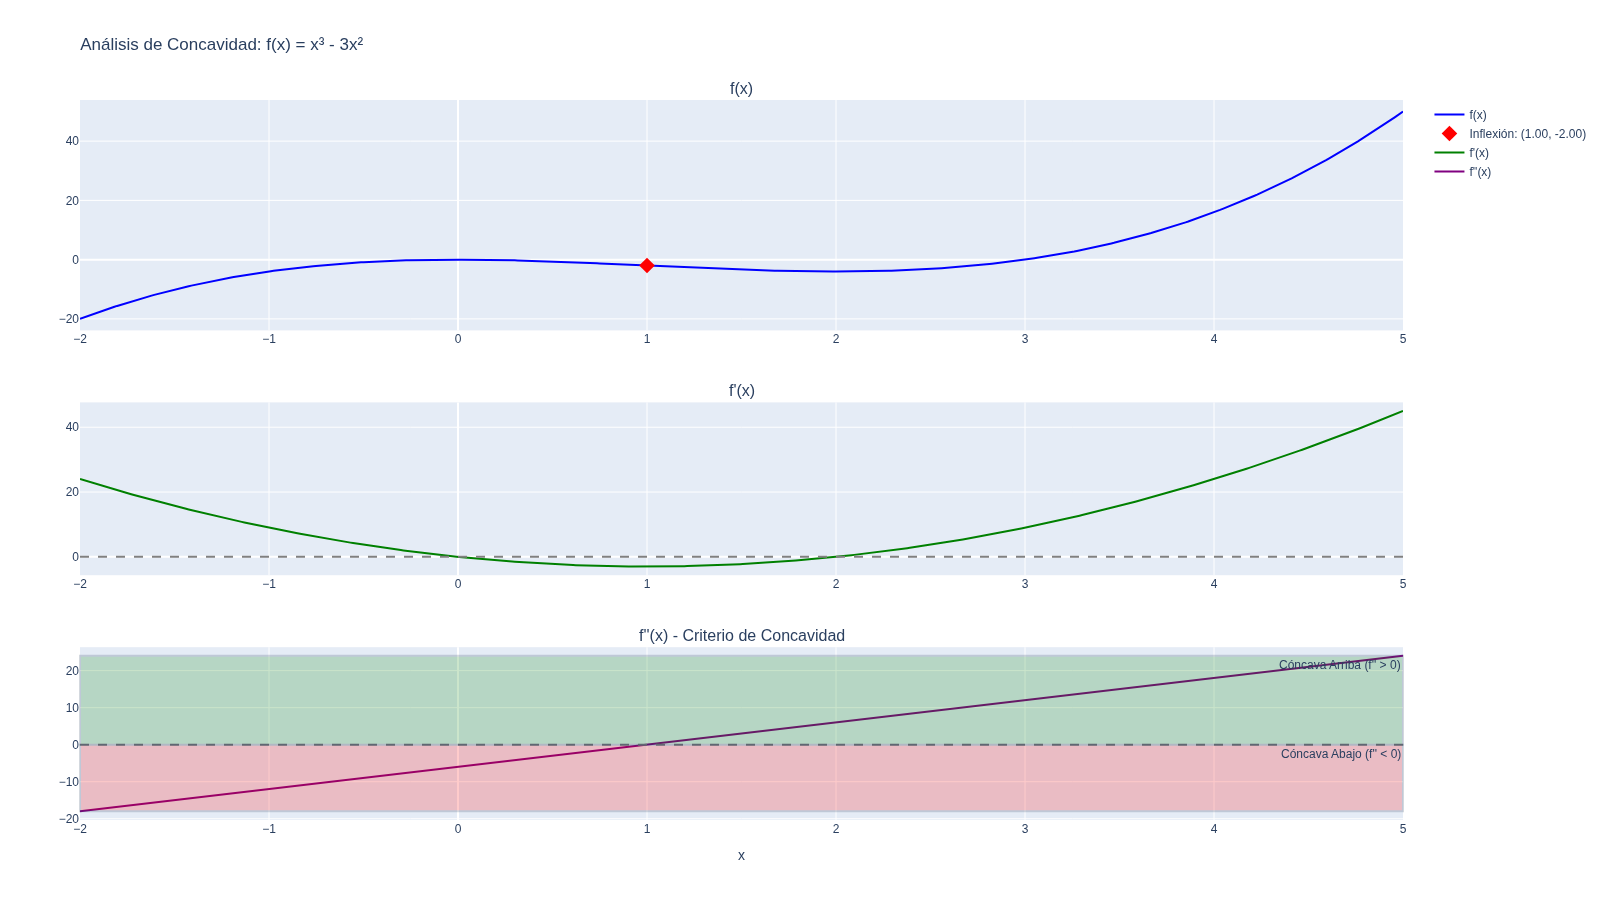

In [3]:
# Visualización con regiones de concavidad
x_vals = np.linspace(-2, 5, 500)
f_lambda = sp.lambdify(x, f, 'numpy')
f_prime_lambda = sp.lambdify(x, f_prime, 'numpy')
f_double_prime_lambda = sp.lambdify(x, f_double_prime, 'numpy')

y_vals = f_lambda(x_vals)
y_prime_vals = f_prime_lambda(x_vals)
y_double_prime_vals = f_double_prime_lambda(x_vals)

# Crear subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('f(x)', "f'(x)", "f''(x) - Criterio de Concavidad"),
    vertical_spacing=0.1,
    row_heights=[0.4, 0.3, 0.3]
)

# f(x) con código de colores para concavidad
fig.add_trace(
    go.Scatter(x=x_vals, y=y_vals, name='f(x)', 
               line=dict(color='blue', width=2)),
    row=1, col=1
)

# Marcar puntos de inflexión
for candidate in inflection_candidates:
    if candidate.is_real:
        c = float(candidate.evalf())
        y_c = float(f.subs(x, c).evalf())
        fig.add_trace(
            go.Scatter(x=[c], y=[y_c], mode='markers',
                      marker=dict(size=12, color='red', symbol='diamond'),
                      name=f'Inflexión: ({c:.2f}, {y_c:.2f})'),
            row=1, col=1
        )

# f'(x)
fig.add_trace(
    go.Scatter(x=x_vals, y=y_prime_vals, name="f'(x)", 
               line=dict(color='green', width=2)),
    row=2, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="gray", row=2, col=1)

# f''(x) con áreas de concavidad
fig.add_trace(
    go.Scatter(x=x_vals, y=y_double_prime_vals, name="f''(x)", 
               line=dict(color='purple', width=2)),
    row=3, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="gray", row=3, col=1)

# Áreas de concavidad
fig.add_hrect(y0=0, y1=max(y_double_prime_vals), 
              fillcolor="green", opacity=0.2, 
              annotation_text="Cóncava Arriba (f'' > 0)",
              row=3, col=1)
fig.add_hrect(y0=min(y_double_prime_vals), y1=0, 
              fillcolor="red", opacity=0.2,
              annotation_text="Cóncava Abajo (f'' < 0)",
              row=3, col=1)

fig.update_xaxes(title_text="x", row=3, col=1)
fig.update_layout(height=900, showlegend=True, 
                  title_text="Análisis de Concavidad: f(x) = x³ - 3x²")
fig.show()

## Ejemplo 2: Múltiples Puntos de Inflexión

### $f(x) = 3x^4 - 4x^3 - 12x^2 + 5$

In [4]:
# Definir función
x = sp.Symbol('x')
f = 3*x**4 - 4*x**3 - 12*x**2 + 5

print("Función:")
display(f)

# Derivadas
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

print("\nPrimera derivada:")
display(f_prime)

print("\nSegunda derivada:")
display(f_double_prime)
print("Factorizada:")
display(sp.factor(f_double_prime))

# Puntos críticos (para referencia)
critical_points = sp.solve(f_prime, x)
print(f"\nPuntos críticos (f' = 0): {[float(p.evalf()) for p in critical_points if p.is_real]}")

# Candidatos a inflexión
inflection_candidates = sp.solve(f_double_prime, x)
print(f"\nCandidatos a inflexión (f'' = 0): {[float(p.evalf()) for p in inflection_candidates if p.is_real]}")

# Tabla de análisis
print("\n" + "="*80)
print("TABLA DE ANÁLISIS COMPLETO")
print("="*80)
print(f"{'Intervalo':<20} {'f''(x)':<15} {'Concavidad':<20} {'Observación':<25}")
print("-"*80)

inflection_points = [float(p.evalf()) for p in inflection_candidates if p.is_real]
inflection_points.sort()

test_points = [inflection_points[0] - 1] + \
              [(inflection_points[i] + inflection_points[i+1])/2 
               for i in range(len(inflection_points)-1)] + \
              [inflection_points[-1] + 1]

intervals = [f"(-∞, {inflection_points[0]:.2f})"] + \
            [f"({inflection_points[i]:.2f}, {inflection_points[i+1]:.2f})" 
             for i in range(len(inflection_points)-1)] + \
            [f"({inflection_points[-1]:.2f}, ∞)"]

for interval, test_pt in zip(intervals, test_points):
    f_double = float(f_double_prime.subs(x, test_pt).evalf())
    concavity = "Cóncava arriba ⌣" if f_double > 0 else "Cóncava abajo ⌢"
    sign = f"+ ({f_double:.2f})" if f_double > 0 else f"- ({f_double:.2f})"
    print(f"{interval:<20} {sign:<15} {concavity:<20}")
    
print("-"*80)

for ip in inflection_points:
    y_ip = float(f.subs(x, ip).evalf())
    print(f"\n✓ Punto de inflexión en ({ip:.4f}, {y_ip:.4f})")

Función:



Primera derivada:



Segunda derivada:


Factorizada:



Puntos críticos (f' = 0): [-1.0, 0.0, 2.0]

Candidatos a inflexión (f'' = 0): [-0.5485837703548635, 1.2152504370215302]

TABLA DE ANÁLISIS COMPLETO
Intervalo            f(x)            Concavidad           Observación              
--------------------------------------------------------------------------------
(-∞, -0.55)          + (99.50)       Cóncava arriba ⌣    
(-0.55, 1.22)        - (-28.00)      Cóncava abajo ⌢     
(1.22, ∞)            + (99.50)       Cóncava arriba ⌣    
--------------------------------------------------------------------------------

✓ Punto de inflexión en (-0.5486, 2.3207)

✓ Punto de inflexión en (1.2153, -13.3578)


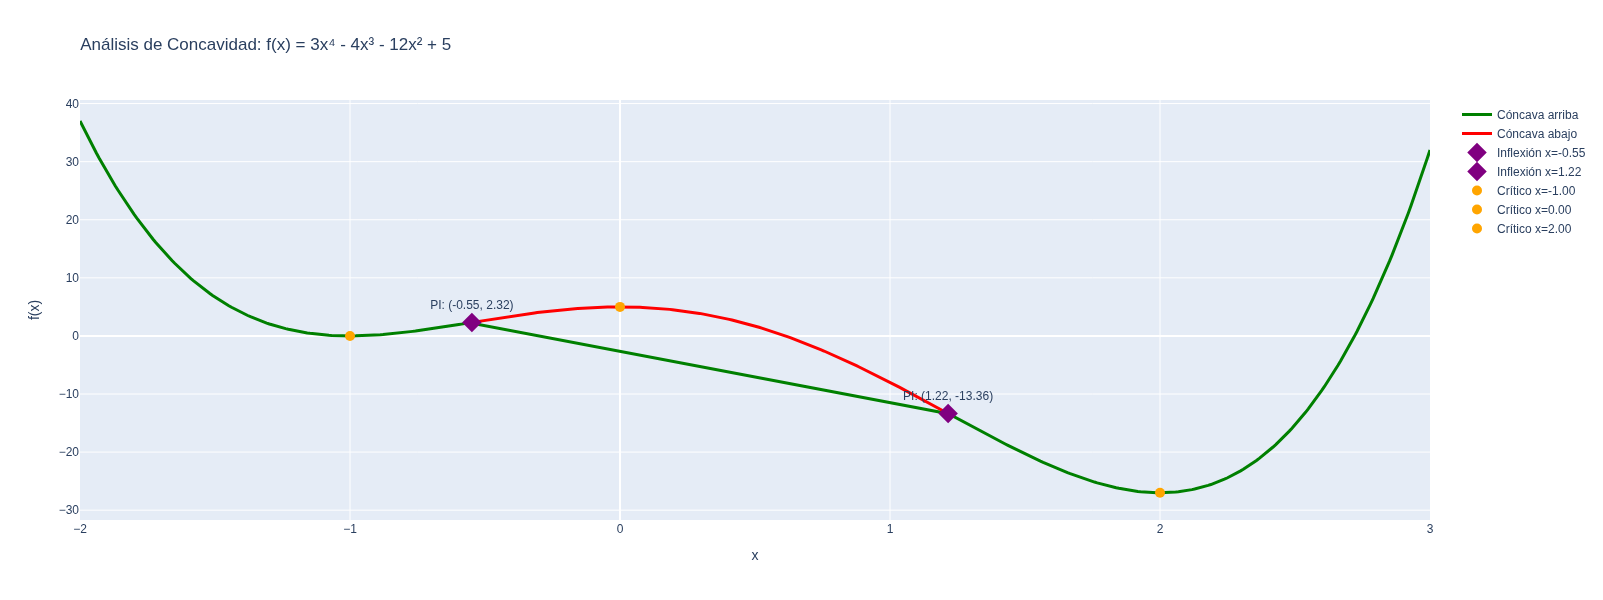

In [5]:
# Visualización avanzada
x_vals = np.linspace(-2, 3, 500)
f_lambda = sp.lambdify(x, f, 'numpy')
f_double_prime_lambda = sp.lambdify(x, f_double_prime, 'numpy')

y_vals = f_lambda(x_vals)
y_double_prime_vals = f_double_prime_lambda(x_vals)

# Separar regiones por concavidad
concave_up_x = x_vals[y_double_prime_vals > 0]
concave_up_y = y_vals[y_double_prime_vals > 0]
concave_down_x = x_vals[y_double_prime_vals < 0]
concave_down_y = y_vals[y_double_prime_vals < 0]

fig = go.Figure()

# Regiones de concavidad con colores
fig.add_trace(go.Scatter(
    x=concave_up_x, y=concave_up_y,
    mode='lines',
    name='Cóncava arriba',
    line=dict(color='green', width=3)
))

fig.add_trace(go.Scatter(
    x=concave_down_x, y=concave_down_y,
    mode='lines',
    name='Cóncava abajo',
    line=dict(color='red', width=3)
))

# Puntos de inflexión
for ip in inflection_points:
    y_ip = float(f.subs(x, ip).evalf())
    fig.add_trace(go.Scatter(
        x=[ip], y=[y_ip],
        mode='markers+text',
        marker=dict(size=15, color='purple', symbol='diamond'),
        text=[f'PI: ({ip:.2f}, {y_ip:.2f})'],
        textposition='top center',
        name=f'Inflexión x={ip:.2f}'
    ))

# Puntos críticos (para referencia)
for cp in critical_points:
    if cp.is_real:
        cp_val = float(cp.evalf())
        y_cp = float(f.subs(x, cp_val).evalf())
        fig.add_trace(go.Scatter(
            x=[cp_val], y=[y_cp],
            mode='markers',
            marker=dict(size=10, color='orange', symbol='circle'),
            name=f'Crítico x={cp_val:.2f}'
        ))

fig.update_layout(
    title='Análisis de Concavidad: f(x) = 3x⁴ - 4x³ - 12x² + 5',
    xaxis_title='x',
    yaxis_title='f(x)',
    height=600,
    showlegend=True
)

fig.show()

## Ejemplo 3: Análisis Combinado - Extremos y Concavidad

### $f(x) = x^3 - 3x^2 - 9x + 4$

In [6]:
# Definir función
x = sp.Symbol('x')
f = x**3 - 3*x**2 - 9*x + 4

print("Función:")
display(f)

# Derivadas
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)

print("\nf'(x):")
display(f_prime)

print("\nf''(x):")
display(f_double_prime)

# Puntos críticos
critical_points = sp.solve(f_prime, x)
print(f"\nPuntos críticos: {critical_points}")

# Puntos de inflexión
inflection_points = sp.solve(f_double_prime, x)
print(f"Puntos de inflexión: {inflection_points}")

print("\n" + "="*80)
print("ANÁLISIS COMPLETO")
print("="*80)

# Clasificar puntos críticos usando segunda derivada
print("\n1. EXTREMOS LOCALES (usando criterio de segunda derivada):")
for cp in critical_points:
    if cp.is_real:
        cp_val = float(cp.evalf())
        f_val = float(f.subs(x, cp_val).evalf())
        f_double = float(f_double_prime.subs(x, cp_val).evalf())
        
        print(f"\n   x = {cp_val:.4f}")
        print(f"   f({cp_val:.4f}) = {f_val:.4f}")
        print(f"   f''({cp_val:.4f}) = {f_double:.4f}")
        
        if f_double > 0:
            print(f"   ✓ MÍNIMO LOCAL (f'' > 0)")
        elif f_double < 0:
            print(f"   ✓ MÁXIMO LOCAL (f'' < 0)")
        else:
            print(f"   ⚠ Criterio no concluyente")

print("\n2. PUNTOS DE INFLEXIÓN:")
for ip in inflection_points:
    if ip.is_real:
        ip_val = float(ip.evalf())
        f_val = float(f.subs(x, ip_val).evalf())
        print(f"\n   Inflexión en ({ip_val:.4f}, {f_val:.4f})")
        print(f"   La concavidad cambia de sentido")

Función:



f'(x):



f''(x):



Puntos críticos: [-1, 3]
Puntos de inflexión: [1]

ANÁLISIS COMPLETO

1. EXTREMOS LOCALES (usando criterio de segunda derivada):

   x = -1.0000
   f(-1.0000) = 9.0000
   f''(-1.0000) = -12.0000
   ✓ MÁXIMO LOCAL (f'' < 0)

   x = 3.0000
   f(3.0000) = -23.0000
   f''(3.0000) = 12.0000
   ✓ MÍNIMO LOCAL (f'' > 0)

2. PUNTOS DE INFLEXIÓN:

   Inflexión en (1.0000, -7.0000)
   La concavidad cambia de sentido


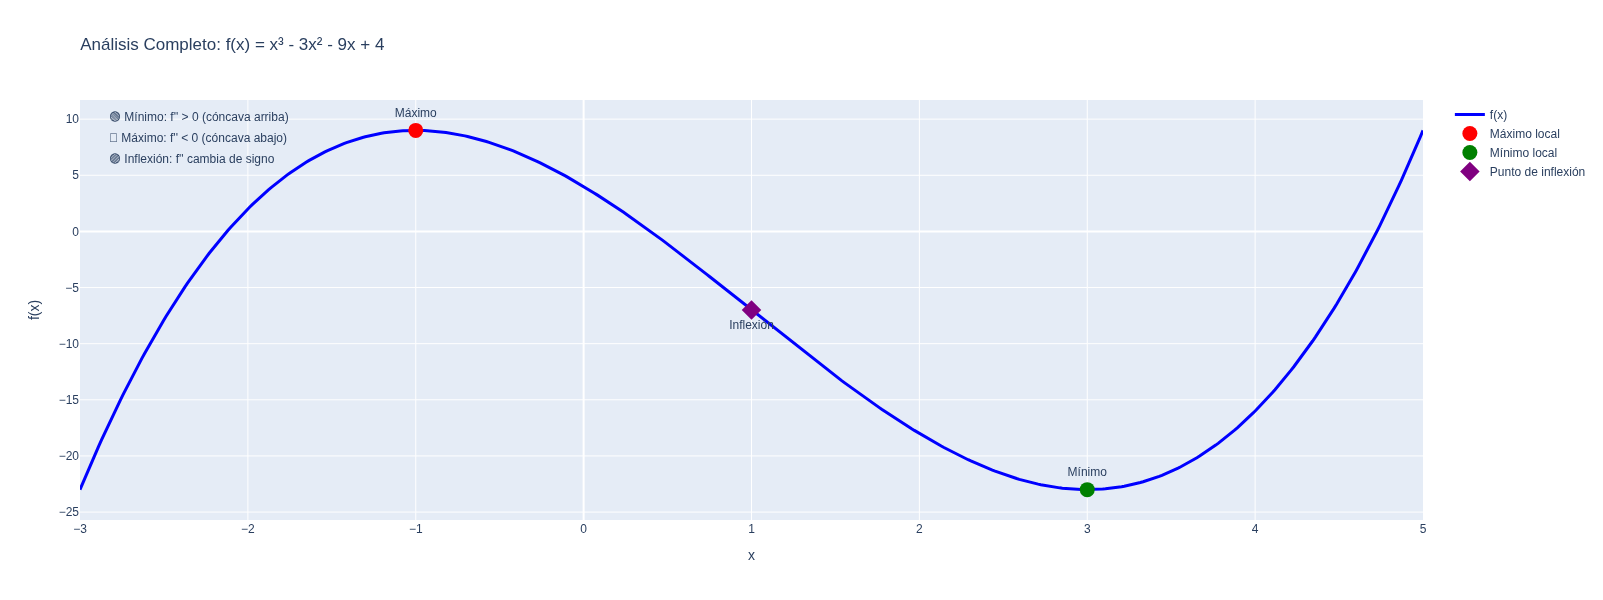

In [7]:
# Visualización completa
x_vals = np.linspace(-3, 5, 500)
f_lambda = sp.lambdify(x, f, 'numpy')
y_vals = f_lambda(x_vals)

fig = go.Figure()

# Función principal
fig.add_trace(go.Scatter(
    x=x_vals, y=y_vals,
    name='f(x)',
    line=dict(color='blue', width=3)
))

# Marcar puntos críticos
for cp in critical_points:
    if cp.is_real:
        cp_val = float(cp.evalf())
        f_val = float(f.subs(x, cp_val).evalf())
        f_double = float(f_double_prime.subs(x, cp_val).evalf())
        
        color = 'green' if f_double > 0 else 'red'
        label = 'Mínimo' if f_double > 0 else 'Máximo'
        
        fig.add_trace(go.Scatter(
            x=[cp_val], y=[f_val],
            mode='markers+text',
            marker=dict(size=15, color=color, symbol='circle'),
            text=[f'{label}'],
            textposition='top center',
            name=f'{label} local'
        ))

# Marcar puntos de inflexión
for ip in inflection_points:
    if ip.is_real:
        ip_val = float(ip.evalf())
        f_val = float(f.subs(x, ip_val).evalf())
        
        fig.add_trace(go.Scatter(
            x=[ip_val], y=[f_val],
            mode='markers+text',
            marker=dict(size=15, color='purple', symbol='diamond'),
            text=['Inflexión'],
            textposition='bottom center',
            name='Punto de inflexión'
        ))

fig.update_layout(
    title='Análisis Completo: f(x) = x³ - 3x² - 9x + 4',
    xaxis_title='x',
    yaxis_title='f(x)',
    height=600,
    showlegend=True,
    annotations=[
        dict(text="🟢 Mínimo: f'' > 0 (cóncava arriba)", 
             xref="paper", yref="paper", x=0.02, y=0.98, showarrow=False),
        dict(text="🔴 Máximo: f'' < 0 (cóncava abajo)", 
             xref="paper", yref="paper", x=0.02, y=0.93, showarrow=False),
        dict(text="🟣 Inflexión: f'' cambia de signo", 
             xref="paper", yref="paper", x=0.02, y=0.88, showarrow=False)
    ]
)

fig.show()

## Resumen y Conclusiones

### Criterios Clave:

1. **Criterio de Concavidad:**
   - Si $f''(x) > 0$ en un intervalo → función **cóncava hacia arriba** ⌣
   - Si $f''(x) < 0$ en un intervalo → función **cóncava hacia abajo** ⌢

2. **Puntos de Inflexión:**
   - Candidatos donde $f''(x) = 0$ o $f''$ no existe
   - Verificar cambio de signo de $f''$

3. **Relación con Extremos:**
   - En un **mínimo local**: $f''(x) > 0$ (cóncava arriba)
   - En un **máximo local**: $f''(x) < 0$ (cóncava abajo)

### Estrategia de Análisis:

1. Calcular $f'(x)$ y $f''(x)$
2. Encontrar puntos críticos: $f'(x) = 0$
3. Encontrar candidatos a inflexión: $f''(x) = 0$
4. Crear tabla de signos de $f''$
5. Clasificar extremos usando $f''$
6. Identificar puntos de inflexión verificando cambio de signo